# HW 5

In this exercise, we want to classify images with neural networks by TensorFlow and Keras frameworks.

First you should analayze the following code which is a sample code from TensorFlow official site. 

https://www.tensorflow.org/tutorials/keras/classification

Then you should implement your code for classification of Mnist dataset.

Note that the following code is only implemented with sequential approach. You should implement your code with both sequential and functional approaches.

## Basic classification: Classify images of clothing

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details

In [11]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Softmax

### Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [12]:
labels_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In the following cells, you can information about this dataset:

In [ ]:
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


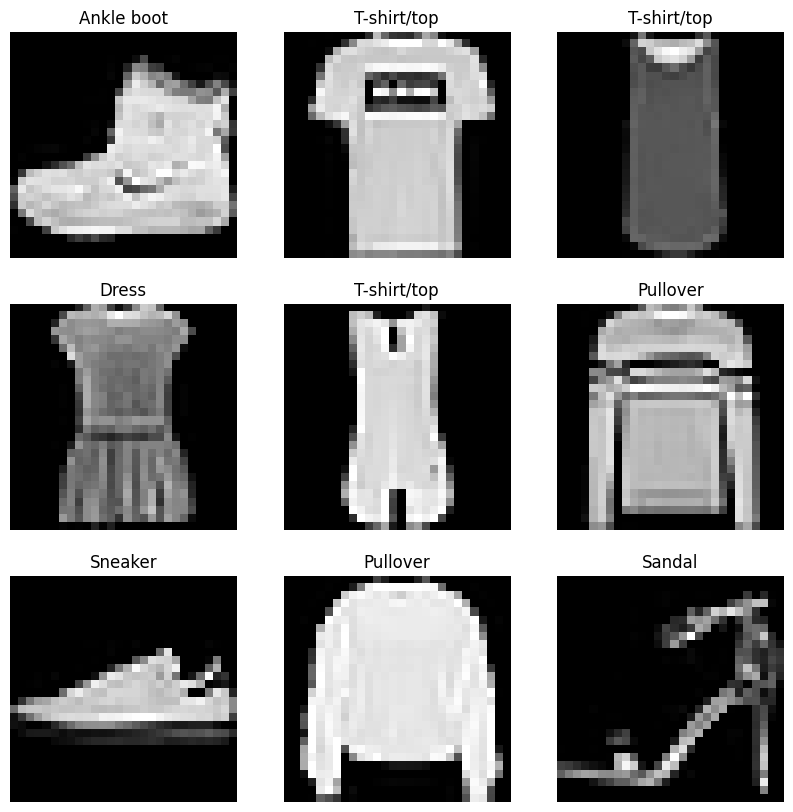

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].astype("uint8"),cmap='gray')
    plt.title(class_names[int(y_train[i])])
    plt.axis("off")

In [ ]:
print(f'y_train[0]: {y_train[0]}')

y_train[0]: 9


### Preprocess the data

You can normalize your data to improve the training performance.

note that it's important that the training set and the testing set be preprocessed in the same way:

In [ ]:
x_train = x_train/ 255.0
x_test = x_test / 255.0

### Build the model

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
seq_model = Sequential()
seq_model.add(Input(shape= (28,28)))
seq_model.add(Flatten())
seq_model.add(Dense(units=128, activation='relu'))
seq_model.add(Dense(units=10))

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.





In [ ]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
seq_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


#### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [13]:
history = seq_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 3.5983 - accuracy: 0.7013
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7049 - accuracy: 0.7537
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5823 - accuracy: 0.7984
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5302 - accuracy: 0.8188
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5008 - accuracy: 0.8299
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4856 - accuracy: 0.8355
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4780 - accuracy: 0.8376
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4637 - accuracy: 0.8427
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4598 - accuracy: 0.8453
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.458

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

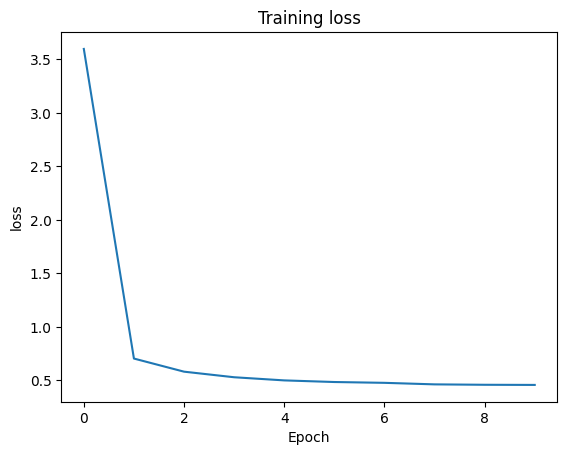

In [14]:
plt.plot(history.history['loss'])
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

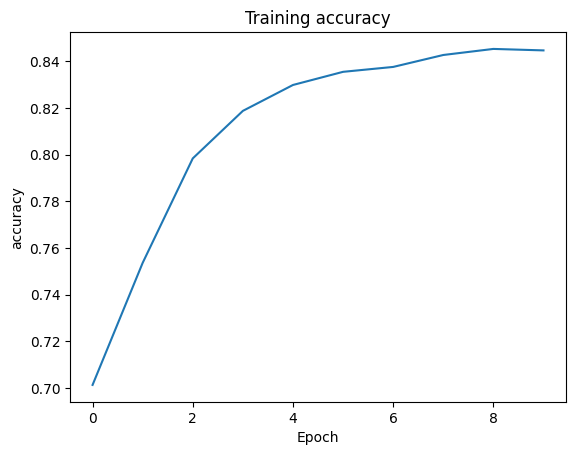

In [15]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

#### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [16]:
test_loss, test_acc = seq_model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5596 - accuracy: 0.8328 - 705ms/epoch - 2ms/step

Test accuracy: 0.8327999711036682


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

#### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [17]:
probability_model = tf.keras.Sequential([seq_model, Softmax()])

In [18]:
y_pred = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
y_pred[0]

array([2.9378572e-14, 3.6304678e-11, 7.3064935e-37, 8.0212378e-13,
       1.6196018e-35, 1.4392673e-02, 6.9516930e-15, 9.1540948e-02,
       8.6883717e-10, 8.9406633e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

label : 9 and class : Ankle boot


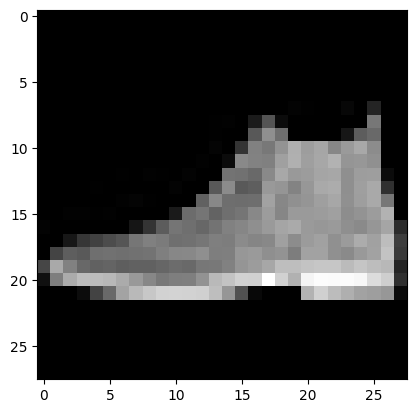

In [20]:
plt.imshow(x_test[0],cmap='gray')
label = np.argmax(y_pred[0])
print(f'label : {label} and class : {class_names[label]}')

## Basic classification: Classify images of handwritten digits

In this section you should design a neural network arcitecutre and train it on [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. note that you should implent your arcitecutre with both sequential and functional approachs. we have already implemented a network with sequential approach on Fashion Mnist dataset. You can read more about functional approach in [this link](https://www.tensorflow.org/guide/keras/functional).
  

You can use [this link](https://keras.io/api/datasets/mnist/) for loading Mnist dataset. 

You should also implement all the prior steps for this dataset. 

In [60]:
# label names of dataset 
labels_name = ['Zero', 'One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
# load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [61]:
# structure of data
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


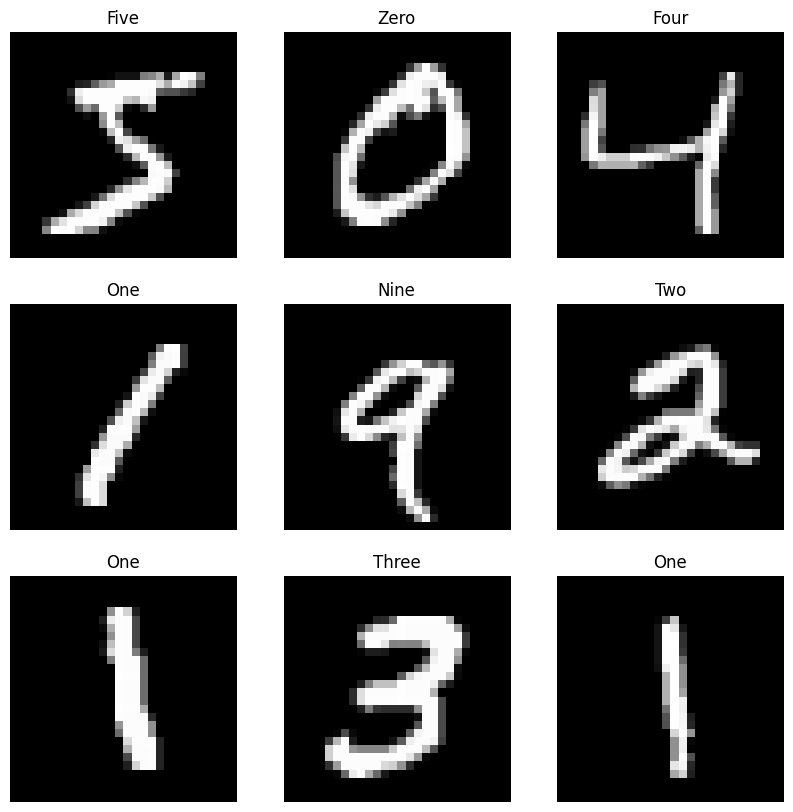

In [62]:
# show some of the datasets pictures
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].astype("uint8"),cmap='gray')
    plt.title(labels_name[int(y_train[i])])
    plt.axis("off")

In [64]:
# scale the colors to 0 to 1
x_train = x_train/ 255.0
x_test = x_test / 255.0

## Sequential approach

In [65]:
# construct the model
seq_model = Sequential()
seq_model.add(Input(shape= (28,28)))
seq_model.add(Flatten())
seq_model.add(Dense(units=128, activation='relu'))
seq_model.add(Dense(units=10))

In [66]:
# compile the model
seq_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
# fut the model
history = seq_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1742 - accuracy: 0.7102
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4904 - accuracy: 0.8723
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3826 - accuracy: 0.8956
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3402 - accuracy: 0.9044
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3167 - accuracy: 0.9097
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3002 - accuracy: 0.9140
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2877 - accuracy: 0.9174
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2768 - accuracy: 0.9205
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2669 - accuracy: 0.9232
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.257

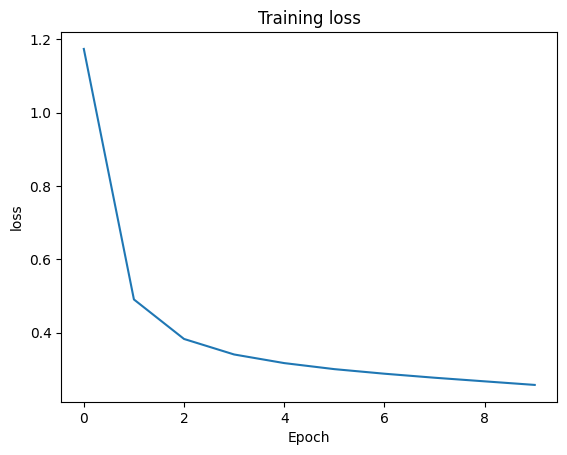

In [68]:
plt.plot(history.history['loss'])
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

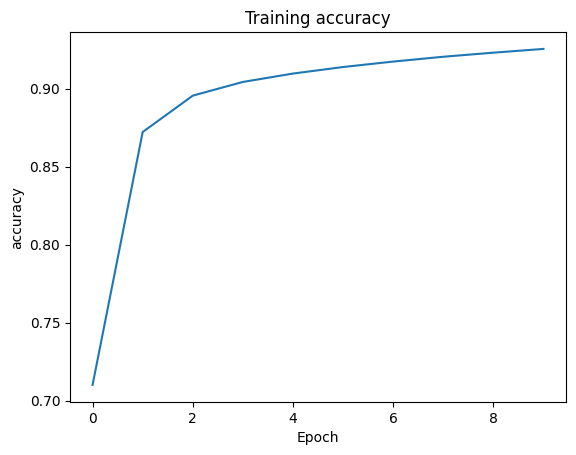

In [69]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

In [70]:
# evaluate and find the accuracy of the model
test_loss, test_acc = seq_model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2482 - accuracy: 0.9276 - 607ms/epoch - 2ms/step

Test accuracy: 0.9276000261306763


In [71]:
# predict the test dataset
y_pred = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [72]:
# apply softmax layer
probability_model = tf.keras.Sequential([seq_model, Softmax()])

label : 8 and class : Bag


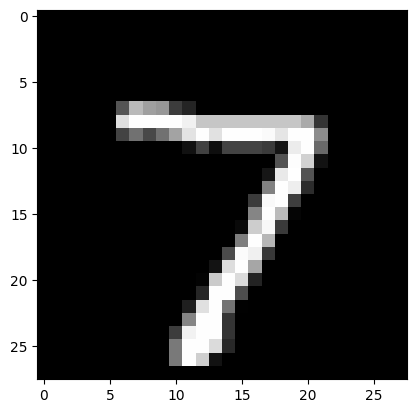

In [73]:
plt.imshow(x_test[0],cmap='gray')
label = np.argmax(y_pred[0])
print(f'label : {label} and class : {class_names[label]}')

## Functional Approch

In [74]:
# label names of dataset 
labels_name = ['Zero', 'One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
# load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [75]:
# scale the colors to 0 to 1
x_train = x_train/ 255.0
x_test = x_test / 255.0

In [76]:
# construct the model graph
input = Input(shape= (28,28))
flatten = Flatten()(input)
d = Dense(units=128, activation='relu')(flatten)
output = Dense(units=10)(d)

In [77]:
# construct the model
model = Model(inputs=input, outputs=output)

In [78]:
# compile the model
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [79]:
# fit the model
hist = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2609 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1153 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0790 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0589 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0447 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0350 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0196 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.016

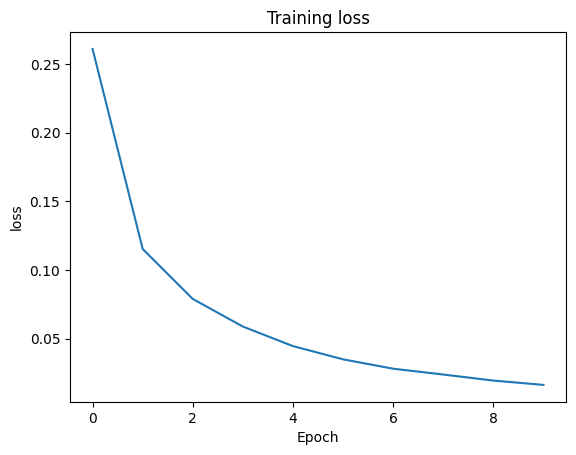

In [80]:
plt.plot(hist.history['loss'])
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

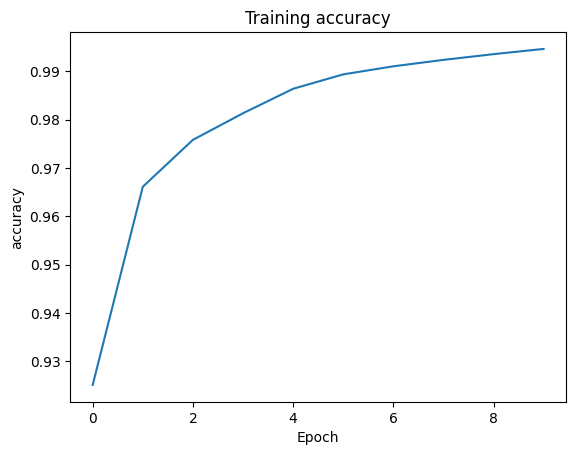

In [81]:
plt.plot(hist.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

In [82]:
# evaluate and find the accuracy of the model
test_loss, test_acc = model.evaluate(x_test,  y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.9777

Test accuracy: 0.9776999950408936


In [83]:
# predict the test dataset
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


label : 7 and class : Seven


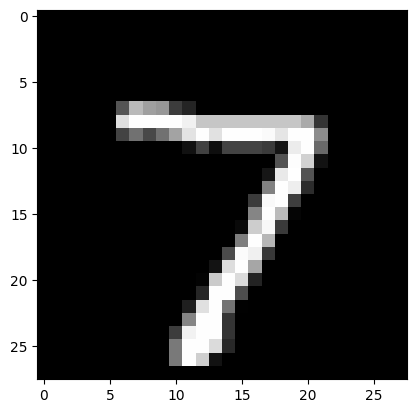

In [84]:
plt.imshow(x_test[0],cmap='gray')
label = np.argmax(y_pred[0])
print(f'label : {label} and class : {labels_name[label]}')